In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings

In [17]:
warnings.filterwarnings("ignore")

In [18]:
# --- Load Ukraine data ---
ua_cpi = pd.read_csv("ua_cpi.csv", parse_dates=["date"])
ua_unemp = pd.read_csv("ua_unemp.csv", parse_dates=["date"])

display(ua_cpi.head())
display(ua_unemp.head())

,date,value
0,2010-03-31,94.77
1,2010-06-30,95.17
2,2010-09-30,96.17
3,2010-12-31,99.37
4,2011-03-31,102.07


,date,value
0,2010-03-31,9.0
1,2010-06-30,7.9
2,2010-09-30,7.1
3,2010-12-31,8.4
4,2011-03-31,8.7


In [19]:
ua_cpi = ua_cpi.sort_values("date")
ua_cpi["infl_yoy"] = ua_cpi["value"].pct_change(4) * 100

In [20]:
ua = ua_cpi.merge(ua_unemp, on="date", suffixes=("_cpi", "_unemp"))
ua[4:].head(10)

,date,value_cpi,infl_yoy,value_unemp
4,2011-03-31,102.07,7.702860,8.7
5,2011-06-30,105.37,10.717663,7.7
6,2011-09-30,104.30,8.453780,6.9
7,2011-12-31,104.40,5.061890,8.2
8,2012-03-31,105.03,2.899971,8.4
9,2012-06-30,105.00,-0.351144,7.1
10,2012-09-30,104.27,-0.028763,6.6
11,2012-12-31,104.20,-0.191571,8.0
12,2013-03-31,104.53,-0.476054,8.0
13,2013-06-30,104.57,-0.409524,6.9


In [21]:
df = ua.dropna()

X = sm.add_constant(df["value_unemp"])
y = df["infl_yoy"]

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               infl_yoy   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     4.974
Date:                Tue, 16 Dec 2025   Prob (F-statistic):             0.0311
Time:                        01:06:24   Log-Likelihood:                -174.27
No. Observations:                  44   AIC:                             352.5
Df Residuals:                      42   BIC:                             356.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -23.6601     15.994     -1.479      0.147     -55.937       8.617
value_unemp     4.0491      1.815      2.230      0.031       0.385       7.713
==============================================================================
Omnibus:                       36.069   Durbin-Watson:                   0.355
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.450
Skew:                           2.281   Prob(JB):                     1.69e-19
Kurtosis:                       8.133   Cond. No.                         72.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

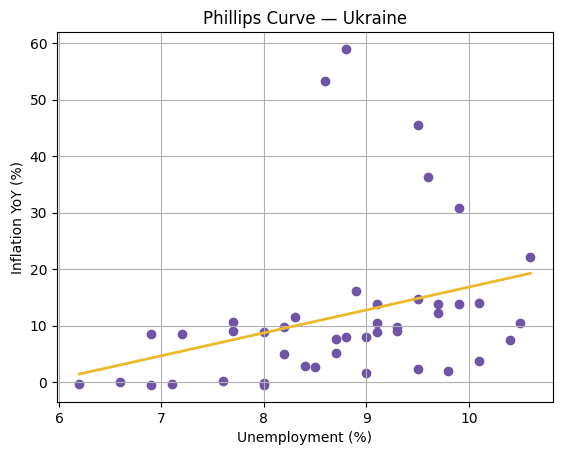

In [22]:
X = sm.add_constant(df["value_unemp"])
y = df["infl_yoy"]
m = sm.OLS(y, X, missing="drop").fit()
x_vals = np.linspace(df["value_unemp"].min(), df["value_unemp"].max(), 100)
y_vals = m.params[0] + m.params[1] * x_vals
plt.plot(x_vals, y_vals, color = '#ECB92A', linewidth=2)

plt.scatter(df["value_unemp"], df["infl_yoy"], color = '#7055A7')
plt.xlabel("Unemployment (%)")
plt.ylabel("Inflation YoY (%)")
plt.title("Phillips Curve — Ukraine")
plt.grid(True)
plt.show()

In [23]:
# --- Load EU data ---
eu_cpi = pd.read_csv("eu_cpi.csv", parse_dates=["date"])
eu_unemp = pd.read_csv("eu_unemp_q.csv", parse_dates=["date"])

display(eu_cpi.head())
display(eu_unemp.head())

,date,Czechia,Estonia,Poland,Romania
0,2010-03-31,92.13,86.15,91.77,85.62
1,2010-06-30,92.80,87.65,92.67,86.19
2,2010-09-30,92.90,88.39,92.70,88.86
3,2010-12-31,92.70,89.66,93.47,90.23
4,2011-03-31,93.90,90.67,95.10,92.08


,date,Czechia,Estonia,Poland,Romania
0,2013-03-31,7.0,8.6,10.6,9.0
1,2013-06-30,6.8,8.3,10.3,8.9
2,2013-09-30,6.6,8.0,9.9,8.8
3,2013-12-31,6.3,7.6,9.6,8.7
4,2014-03-31,6.1,7.3,9.2,8.6


In [24]:
eu_cpi = eu_cpi.sort_values("date")
for col in ["Czechia", "Estonia", "Poland", "Romania"]:
    eu_cpi[col + "_yoy"] = eu_cpi[col].pct_change(4) * 100

In [25]:
eu = eu_cpi.merge(eu_unemp, on="date", suffixes=("_cpi", "_unemp"))
eu.head()

,date,Czechia_cpi,Estonia_cpi,Poland_cpi,Romania_cpi,Czechia_yoy,Estonia_yoy,Poland_yoy,Romania_yoy,Czechia_unemp,Estonia_unemp,Poland_unemp,Romania_unemp
0,2013-03-31,99.33,98.48,100.30,99.08,1.741268,3.838043,1.282440,4.813287,7.0,8.6,10.6,9.0
1,2013-06-30,99.57,99.78,100.73,99.46,1.498471,3.699855,0.528942,4.408986,6.8,8.3,10.3,8.9
2,2013-09-30,99.27,100.28,100.73,98.76,1.223616,3.360132,0.861119,2.373795,6.6,8.0,9.9,8.8
3,2013-12-31,99.20,99.30,100.70,98.88,1.121305,2.107969,0.599401,1.249232,6.3,7.6,9.6,8.7
4,2014-03-31,99.63,99.59,100.93,100.32,0.302024,1.127132,0.628116,1.251514,6.1,7.3,9.2,8.6


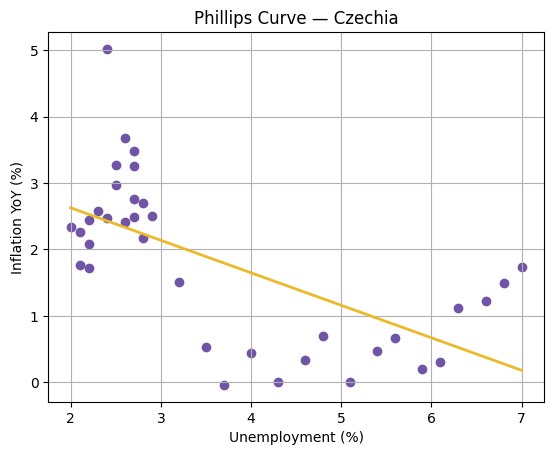

In [26]:
country = "Czechia"

X = sm.add_constant(eu[country + "_unemp"])
y = eu[country + "_yoy"]
m = sm.OLS(y, X, missing="drop").fit()
x_vals = np.linspace(eu[country + "_unemp"].min(), eu[country + "_unemp"].max(), 100)
y_vals = m.params[0] + m.params[1] * x_vals
plt.plot(x_vals, y_vals, color = '#ECB92A', linewidth=2)

plt.scatter(eu[country + "_unemp"], eu[country + "_yoy"], color = '#7055A7')
plt.xlabel("Unemployment (%)")
plt.ylabel("Inflation YoY (%)")
plt.title(f"Phillips Curve — {country}")
plt.grid(True)
plt.show()

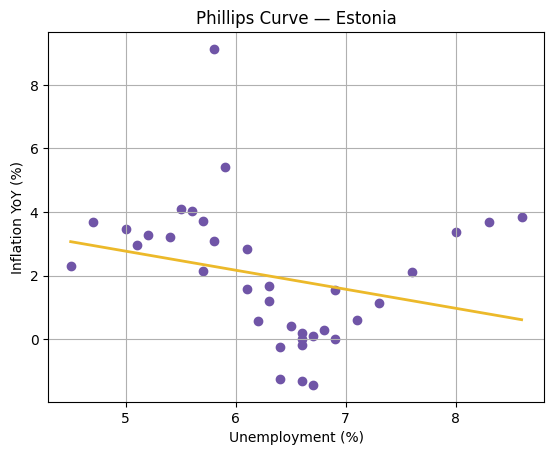

In [27]:
country = "Estonia"

X = sm.add_constant(eu[country + "_unemp"])
y = eu[country + "_yoy"]
m = sm.OLS(y, X, missing="drop").fit()
x_vals = np.linspace(eu[country + "_unemp"].min(), eu[country + "_unemp"].max(), 100)
y_vals = m.params[0] + m.params[1] * x_vals
plt.plot(x_vals, y_vals, color = '#ECB92A', linewidth=2)

plt.scatter(eu[country + "_unemp"], eu[country + "_yoy"], color = '#7055A7')
plt.xlabel("Unemployment (%)")
plt.ylabel("Inflation YoY (%)")
plt.title(f"Phillips Curve — {country}")
plt.grid(True)
plt.show()

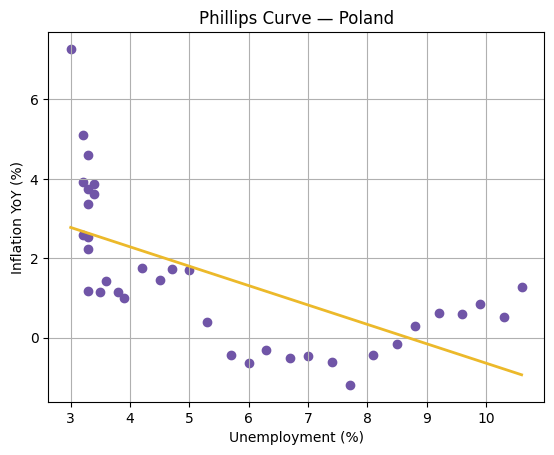

In [28]:
country = "Poland"

X = sm.add_constant(eu[country + "_unemp"])
y = eu[country + "_yoy"]
m = sm.OLS(y, X, missing="drop").fit()
x_vals = np.linspace(eu[country + "_unemp"].min(), eu[country + "_unemp"].max(), 100)
y_vals = m.params[0] + m.params[1] * x_vals
plt.plot(x_vals, y_vals, color = '#ECB92A', linewidth=2)

plt.scatter(eu[country + "_unemp"], eu[country + "_yoy"], color = '#7055A7')
plt.xlabel("Unemployment (%)")
plt.ylabel("Inflation YoY (%)")
plt.title(f"Phillips Curve — {country}")
plt.grid(True)
plt.show()

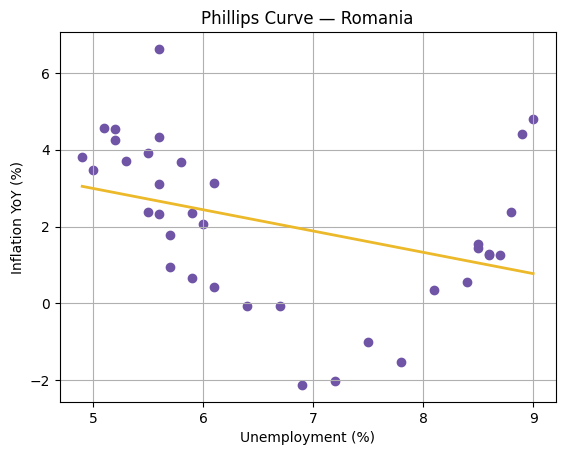

In [29]:
country = "Romania"

X = sm.add_constant(eu[country + "_unemp"])
y = eu[country + "_yoy"]
m = sm.OLS(y, X, missing="drop").fit()
x_vals = np.linspace(eu[country + "_unemp"].min(), eu[country + "_unemp"].max(), 100)
y_vals = m.params[0] + m.params[1] * x_vals
plt.plot(x_vals, y_vals, color = '#ECB92A', linewidth=2)

plt.scatter(eu[country + "_unemp"], eu[country + "_yoy"], color = '#7055A7')
plt.xlabel("Unemployment (%)")
plt.ylabel("Inflation YoY (%)")
plt.title(f"Phillips Curve — {country}")
plt.grid(True)
plt.show()